# **Setting up the environment**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
data = pd.read_csv("/kaggle/input/wsb-dataset/wsb.csv")

# **EDA**

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Month                  48 non-null     int64
 1   Sale Quantity          48 non-null     int64
 2   Promotion Expenses     48 non-null     int64
 3   Competition Promotion  48 non-null     int64
dtypes: int64(4)
memory usage: 1.6 KB


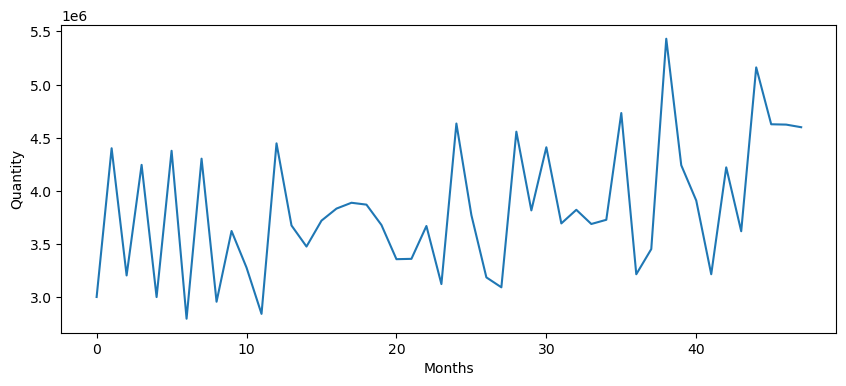

In [4]:
plt.figure(figsize=(10,4))
plt.xlabel("Months")
plt.ylabel("Quantity")
plt.plot(data['Sale Quantity'])

# **Moving Average**

In [5]:
data['mavg12'] = data['Sale Quantity'].rolling(window=12).mean().shift(1) 

In [6]:
pd.set_option('display.float_format', lambda x: '%.2f' % x) 
data[['Sale Quantity', 'mavg12']][0:] 

,Sale Quantity,mavg12
0,3002666,NaN
1,4401553,NaN
2,3205279,NaN
3,4245349,NaN
4,3001940,NaN
5,4377766,NaN
6,2798343,NaN
7,4303668,NaN
8,2958185,NaN
9,3623386,NaN


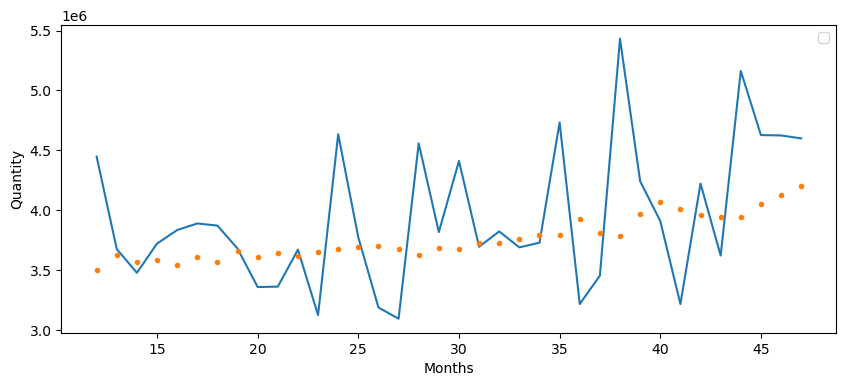

In [7]:
plt.figure( figsize=(10,4)) 
plt.xlabel( "Months" ) 
plt.ylabel( "Quantity" ) 
plt.plot( data['Sale Quantity'][12:] ); 
plt.plot( data['mavg12'][12:], '.' ); 
plt.legend()

# **Forecast Accuracy**

**Mean Absolute Percentage Error**

In [8]:
def get_mape(actual , predicted):
    y_true , y_pred = np.array(actual) , np.array(predicted)
    return np.round(np.mean(np.abs((actual - predicted)/actual))*100 , 2)

In [9]:
get_mape(data['Sale Quantity'][36:].values , data['mavg12'][36:].values)

14.04

**Root Mean Square Error**

In [10]:
from sklearn.metrics import mean_squared_error
np.sqrt(mean_squared_error(data['Sale Quantity'][36:].values , data['mavg12'][36:].values))

734725.8359239782

# **Exponential Smoothing**

In [11]:
data['ewm'] = data['Sale Quantity'].ewm(alpha = 0.2).mean()

In [12]:
data[36:]

,Month,Sale Quantity,Promotion Expenses,Competition Promotion,mavg12,ewm
36,37,3216483,121,1,3928410.33,3828234.64
37,38,3453239,128,0,3810280.00,3753219.93
38,39,5431651,170,0,3783643.33,4088961.93
39,40,4241851,160,0,3970688.42,4119543.81
40,41,3909887,151,1,4066369.08,4077607.99
41,42,3216438,120,1,4012412.75,3905359.34
42,43,4222005,152,0,3962369.58,3968692.78
43,44,3621034,125,0,3946629.42,3899157.24
44,45,5162201,170,0,3940489.50,4151776.99
45,46,4627177,160,0,4052117.17,4246860.31


In [13]:
get_mape(data['Sale Quantity'][36:].values , data['ewm'][36:].values)

11.15

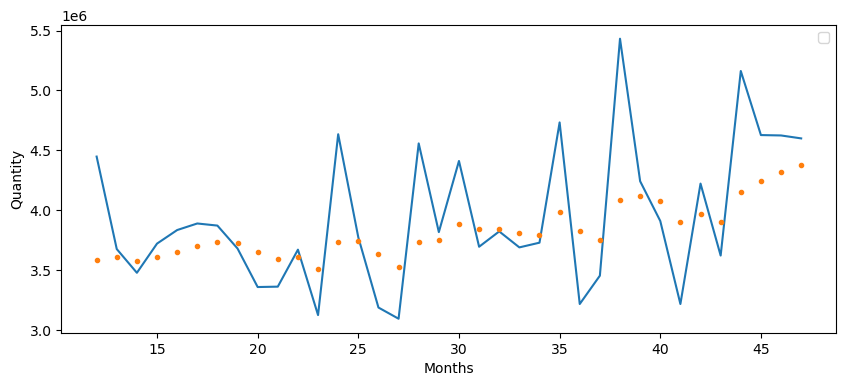

In [14]:
plt.figure( figsize=(10,4)) 
plt.xlabel( "Months" ) 
plt.ylabel( "Quantity" ) 
plt.plot( data['Sale Quantity'][12:] ); 
plt.plot( data['ewm'][12:], '.' ); 
plt.legend()

# **Decomposing Time Series**

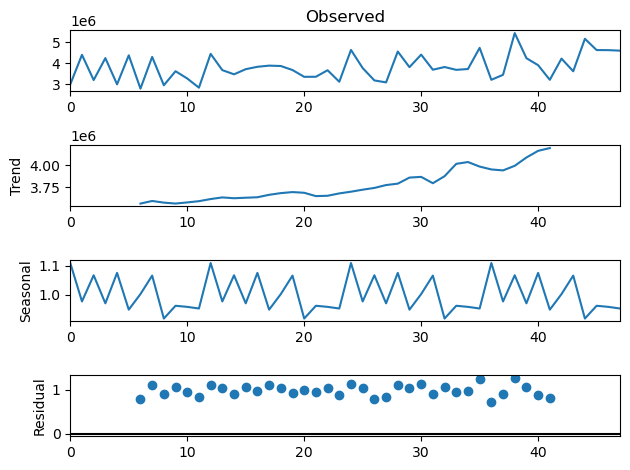

In [15]:
from statsmodels.tsa.seasonal import seasonal_decompose

decompse = seasonal_decompose( np.array(data['Sale Quantity']), 
model='multiplicative', period = 12 )
plot = decompse.plot()

In [16]:
data['seasonal'] = decompse.seasonal
data['trend'] = decompse.trend

# **AUTO-REGRESSIVE INTEGRATED MOVING AVERAGE (ARIMA) MODELS**

# **Auto-Regressive (AR) Models**

**ACF & PACF**

In [17]:
data = pd.read_csv("/kaggle/input/virmana/vimana.csv")

In [18]:
data.head()

,Month,demand
0,1,457
1,2,439
2,3,404
3,4,392
4,5,403


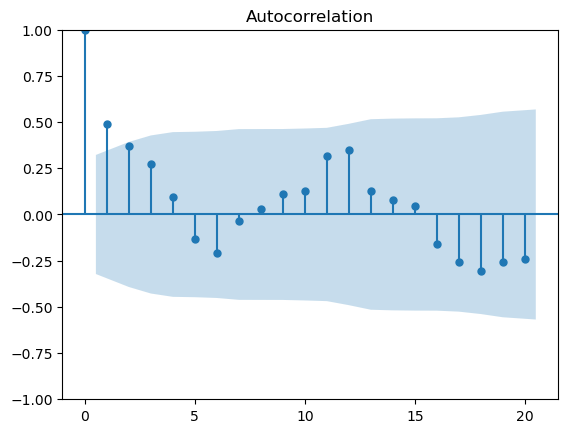

In [19]:
from statsmodels.graphics.tsaplots import plot_acf , plot_pacf

acf_plot = plot_acf(data.demand , lags=20)

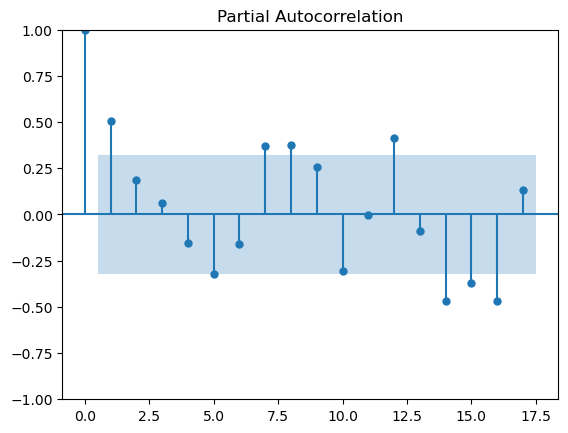

In [20]:
pacf_plot = plot_pacf(data.demand , lags=17) #lags must be <18 

**ARIMA**

In [21]:
from statsmodels.tsa.arima.model import ARIMA

ar_model=ARIMA(data.demand,order=(1,0,0)).fit()
ar_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   37
Model:                 ARIMA(1, 0, 0)   Log Likelihood                -226.602
Date:                Fri, 02 Jun 2023   AIC                            459.205
Time:                        17:51:56   BIC                            464.037
Sample:                             0   HQIC                           460.909
                                 - 37                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        535.1338     40.213     13.307      0.000     456.317     613.950
ar.L1          0.4867      0.175      2.785      0.005       0.144       0.829
sigma2      1.213e+04   3297.183      3.680      0.000    5669.771    1.86e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.22   Jarque-Bera (JB):                 1.81
Prob(Q):                              0.64   Prob(JB):                         0.40
Heteroskedasticity (H):               1.58   Skew:                             0.53
Prob(H) (two-sided):                  0.44   Kurtosis:                         2.76
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Forecasting and measuring accuracy**

In [22]:
forecast = ar_model.predict(30,36)
forecast

30   490.29
31   519.49
32   609.53
33   567.68
34   580.82
35   675.23
36   601.26
Name: predicted_mean, dtype: float64

In [23]:
get_mape(data.demand[30:] , forecast)

13.08

# **Moving Average (MA) processes**

In [24]:
ma_model=ARIMA(data.demand,order=(0,0,1)).fit()
ma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   37
Model:                 ARIMA(0, 0, 1)   Log Likelihood                -228.218
Date:                Fri, 02 Jun 2023   AIC                            462.435
Time:                        17:51:57   BIC                            467.268
Sample:                             0   HQIC                           464.139
                                 - 37                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        537.1721     28.671     18.735      0.000     480.977     593.367
ma.L1          0.3660      0.198      1.847      0.065      -0.022       0.754
sigma2      1.328e+04   4037.449      3.290      0.001    5371.219    2.12e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.44   Jarque-Bera (JB):                 1.89
Prob(Q):                              0.51   Prob(JB):                         0.39
Heteroskedasticity (H):               1.31   Skew:                             0.52
Prob(H) (two-sided):                  0.65   Kurtosis:                         2.62
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Forecasting and measuring accuracy**

In [25]:
forecast = ma_model.predict(30,36)
forecast

30   527.44
31   528.23
32   595.65
33   539.50
34   569.93
35   629.80
36   552.25
Name: predicted_mean, dtype: float64

In [26]:
get_mape(data.demand[30:] , forecast)

13.38

# **ARMA Model**

In [27]:
arma_model=ARIMA(data.demand,order=(1,0,1)).fit()
arma_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   37
Model:                 ARIMA(1, 0, 1)   Log Likelihood                -226.094
Date:                Fri, 02 Jun 2023   AIC                            460.187
Time:                        17:51:57   BIC                            466.631
Sample:                             0   HQIC                           462.459
                                 - 37                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        534.5287     50.146     10.659      0.000     436.243     632.814
ar.L1          0.7009      0.309      2.269      0.023       0.095       1.306
ma.L1         -0.2844      0.531     -0.536      0.592      -1.325       0.756
sigma2      1.179e+04   3142.638      3.751      0.000    5628.803    1.79e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                 2.02
Prob(Q):                              0.91   Prob(JB):                         0.36
Heteroskedasticity (H):               1.73   Skew:                             0.57
Prob(H) (two-sided):                  0.35   Kurtosis:                         2.95
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

**Forecasting and measuring accuracy**

In [28]:
forecast = arma_model.predict(30,36)
forecast

30   486.39
31   507.71
32   590.81
33   578.63
34   586.41
35   669.41
36   629.72
Name: predicted_mean, dtype: float64

In [29]:
get_mape(data.demand[30:] , forecast)

13.95

# **Dicky-Fuller Test**

In [30]:
from statsmodels.tsa.stattools import adfuller
def adfuller_test( ts ): 
    adfuller_result = adfuller( ts, autolag=None ) 
    adfuller_out = pd.Series(adfuller_result[0:4], 
    index=['Test Statistic', 'p-value', 'Lags Used', 'Number of Observations Used']) 
    print( adfuller_out ) 

In [31]:
adfuller_test(data.demand)

Test Statistic                -1.29
p-value                        0.63
Lags Used                     10.00
Number of Observations Used   26.00
dtype: float64


**Differencing**

In [32]:
data['demand_diff'] = data.demand - data.demand.shift(1)
data.head()

,Month,demand,demand_diff
0,1,457,NaN
1,2,439,-18.00
2,3,404,-35.00
3,4,392,-12.00
4,5,403,11.00


In [33]:
data = data.dropna()

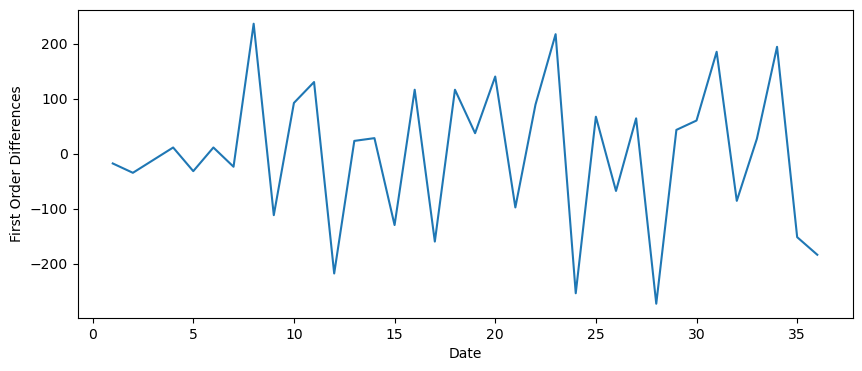

In [34]:
plt.figure( figsize=(10,4)) 
plt.xlabel( "Date" ) 
plt.ylabel( "First Order Differences" ) 
plt.plot( data.demand_diff )

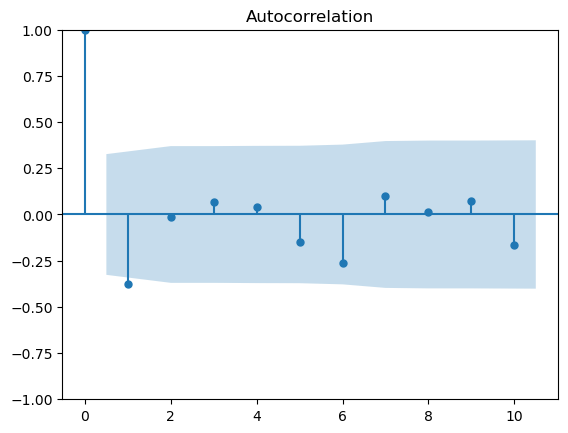

In [35]:
pacf_plot = plot_acf( data.demand_diff.dropna(), 
lags=10 ) 

In [36]:
train = data[0:100] 
test = data[100:] 

In [37]:
arima_model=ARIMA(train.demand ,order=(1,1,1)).fit()
arima_model.summary()

/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/opt/conda/lib/python3.10/site-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: An unsupported index was provided and will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                 demand   No. Observations:                   36
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -215.793
Date:                Fri, 02 Jun 2023   AIC                            437.586
Time:                        17:51:58   BIC                            442.252
Sample:                             0   HQIC                           439.196
                                 - 36                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.3396      0.395      0.859      0.390      -0.435       1.114
ma.L1         -0.8578      0.176     -4.883      0.000      -1.202      -0.513
sigma2      1.298e+04   3395.178      3.824      0.000    6327.083    1.96e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.43   Jarque-Bera (JB):                 0.38
Prob(Q):                              0.51   Prob(JB):                         0.83
Heteroskedasticity (H):               1.53   Skew:                             0.26
Prob(H) (two-sided):                  0.47   Kurtosis:                         3.01
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

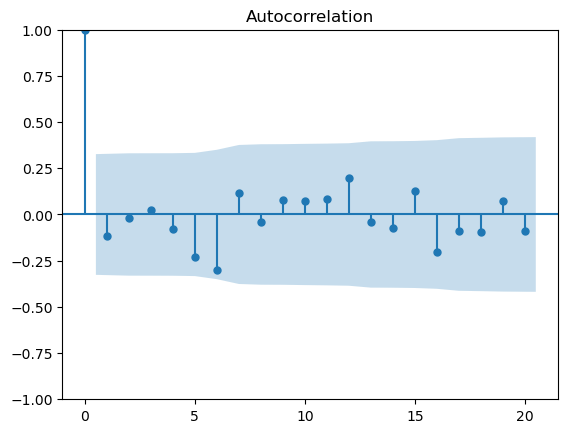

In [38]:
acf_plot = plot_acf(arima_model.resid, 
lags = 20) 

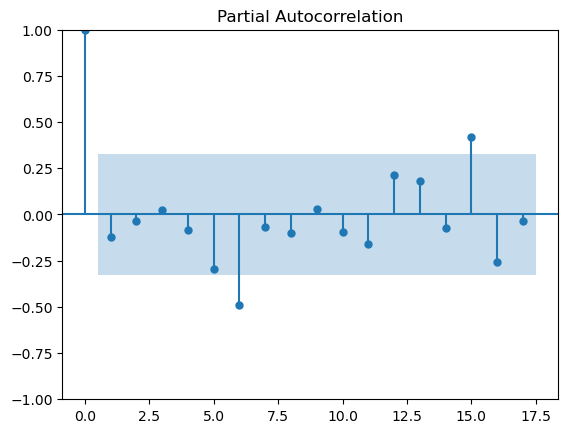

In [39]:
pacf_plot = plot_pacf(arima_model.resid, 
lags = 17)